In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import datetime

In [2]:
jzg_comments=pd.read_csv('xiecheng.csv',encoding='utf-8-sig')
jzg_comments['time']=jzg_comments['time'].apply(lambda x:x.split(' ')[0])
print(jzg_comments.info())
print(jzg_comments.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3050 entries, 0 to 3049
Data columns (total 5 columns):
id         3050 non-null int64
user       3050 non-null object
time       3050 non-null object
score      3050 non-null int64
content    3050 non-null object
dtypes: int64(2), object(3)
memory usage: 119.3+ KB
None
          id      user        time  score  \
0  163422726    雪3飞who  2020-05-11      5   
1  163345969      LHCY  2020-05-01      5   
2  163422243    真诚7577  2020-05-11      5   
3  163411030  Tom84114  2020-05-09      5   
4  163257235    猫猫的小世界  2020-04-17      5   

                                             content  
0  老法师的拍照建议（当然不是我😂）&#x0A;🔺镜海和犀牛海无风时的倒影最美，要赶在早上人少的...  
1  九寨沟位于四川省阿坝藏族羌族自治州九寨沟县境内，地处青藏高原、川西高原、山地向四川盆地过渡地...  
2  确实不愧是中国最美的水，九寨归来不看来确实是名不虚传，原始自然风景保护的真的好，一个个景点之...  
3  九寨沟还需要点评吗？旅游要么自然要么人文，自然要么山要么水。智者乐山，仁者乐水；黄山归来不看...  
4  九寨归来不看水！这里就是上帝打翻的调色板，五颜六色五彩缤纷五光十色！！秋天过来那简直就是置身...  


In [3]:
# convert to datetime
jzg_comments['time']=pd.to_datetime(jzg_comments['time'],format='%Y-%m-%d')

jzg_comments.set_index('time',inplace=True) 

In [4]:
print(jzg_comments.info())
print(jzg_comments.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3050 entries, 2020-05-11 to 2017-06-02
Data columns (total 4 columns):
id         3050 non-null int64
user       3050 non-null object
score      3050 non-null int64
content    3050 non-null object
dtypes: int64(2), object(2)
memory usage: 119.1+ KB
None
                   id      user  score  \
time                                     
2020-05-11  163422726    雪3飞who      5   
2020-05-01  163345969      LHCY      5   
2020-05-11  163422243    真诚7577      5   
2020-05-09  163411030  Tom84114      5   
2020-04-17  163257235    猫猫的小世界      5   

                                                      content  
time                                                           
2020-05-11  老法师的拍照建议（当然不是我😂）&#x0A;🔺镜海和犀牛海无风时的倒影最美，要赶在早上人少的...  
2020-05-01  九寨沟位于四川省阿坝藏族羌族自治州九寨沟县境内，地处青藏高原、川西高原、山地向四川盆地过渡地...  
2020-05-11  确实不愧是中国最美的水，九寨归来不看来确实是名不虚传，原始自然风景保护的真的好，一个个景点之...  
2020-05-09  九寨沟还需要点评吗？旅游要么自然要么人文，自然要么山要么水。智者乐山，仁者乐水；黄山归来不看...  
2020-04-17  九寨

In [5]:
cmt=list(jzg_comments['content'])

In [6]:
## 合并所有评论信息
all_comments=' '.join(cmt)
content=all_comments

### 分词和取停用词

In [7]:
# 导入基本的工具库
import jieba
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from imageio import imread
from collections import Counter
import numpy as np
import re

In [8]:
#数据清理
content = re.sub(r'\n+','',content) #remove \n
content = re.sub(r' +','',content)  #remove blank
content = re.sub(r'\W+',' ',content) #replace symbols with blank

remove_list=['x0A','景区','九寨沟','九寨'] #
for re_wd in remove_list:
    content = re.sub(re_wd,' ',content) #replace symbols with blank


In [9]:
#分词
seg_list = list(jieba.cut(content))
print("分词结果: \n","/".join(seg_list[:99]))     #显示部分分词结果

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\admin\AppData\Local\Temp\jieba.cache
Loading model cost 2.461 seconds.
Prefix dict has been built successfully.


分词结果: 
 老/法师/的/拍照/建议/ /当然/不是/我/ / / /镜海/和/犀牛/海无风时/的/倒影/最美/ /要/赶/在/早上/人少/的/时候/拍摄/ / / /五彩池/建议/在/中午/有/阳光/拍摄/ /比较/容易/出片/ / / /在/公路/旁/栈道/上/的/观景台/拍摄/树正/瀑布/和/五花海/全景/最佳/ / / / / /目前/ /实行/限/区域/开放/ /开放/扎如沟/的/扎/如寺/ /树正沟/ /火花/海/除外/ /日则沟/ /诺日朗/至/五花海/段/景点/ /则/查洼沟/ / / / / /tips


In [10]:
#加载停用词表
with open('stopwords.txt',encoding='utf-8') as fw:
    stopwords = fw.read() #长字符串
    stopwords = stopwords.split('\n')       #字符串按'\n'分割，构建列表类型

### 可以在stopwords基础上扩展停用词表

print("停用词: \n",",".join(stopwords[:20]))      #显示部分停用词，第一个为空格

停用词: 
  ,?,、,。,“,”,《,》,！,，,：,；,？,同志们,同时,啊,阿,哎,哎呀,哎哟


In [11]:
#去停用词
final_content = []
for seg in seg_list:
    if seg not in stopwords:
        final_content.append(seg)
print("分词结果: \n","/".join(final_content[:99]))     #显示部分处理结果

分词结果: 
 法师/拍照/建议/镜海/犀牛/海无风时/倒影/最美/早上/人少/拍摄/五彩池/建议/中午/阳光/拍摄/比较/容易/出片/公路/旁/栈道/观景台/拍摄/树正/瀑布/五花海/全景/最佳/目前/实行/限/区域/开放/开放/扎如沟/扎/如寺/树正沟/火花/海/日则沟/诺日朗/五花海/段/景点/查洼沟/tips/属于/高原气候/早晚/温差/记得/携带/保暖/衣物/阳光/紫外线/很强/需注意/防晒/海拔/高/部分/人/发生/高反/当地/导游/说/扎如寺/温州人/承包/稍微/有点/变味/爱好/选择/前往/推荐/一个/比较/偷懒/方式/门口/请个/当地人/导游/谈/价钱/之后/200/元/成交/最/合理/路线/游玩/坐


### 词频分析

In [ ]:
#使用 counter 做词频统计，选取出现频率前 200 的词汇
counting_words = Counter(final_content)
common_words = counting_words.most_common(200)

common_words_dict=dict(common_words)

# 保存到txt文档
with open('wordcount.txt', 'w',encoding='utf-8') as fw:
    for k,v in common_words_dict.items():
        fw.write('%s,%d\n' % (k, v))

In [23]:
common_words_df = pd.DataFrame(common_words, columns=['关键词','词频']) #关键词-词频列矩阵
print(common_words_df.head())
num = len(common_words)
net = pd.DataFrame(np.mat(np.zeros((num,num))),columns=common_words_df.iloc[:,0],index=common_words_df.iloc[:,0]) #初始化共词矩阵
net.head()

  关键词   词频
0   美  683
1   好  642
2   人  599
3  景色  526
4  风景  525


关键词,美,好,人,景色,风景,景点,值得,地方,真的,瀑布,...,应该,人间天堂,出发,照片,以后,之前,夏天,无法,一路,体验
关键词,,,,,,,,,,,,,,,,,,,,,
美,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
好,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
人,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
景色,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
风景,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
# 读入图片，配置词云背景
backgroud_pic = imread('cn_map.jpg')
# 配置词云参数
wc = WordCloud(
    # 设置背景色,我这里设置为了..
    background_color = 'white',
    # 设置词云形状，就是之前读入的图片
    mask = backgroud_pic,
    # 设置字体,字体路径要正确，不然会报错，最好和py文件放在一块
    font_path = 'simhei.ttf',

    max_words=2000,      # 设置最大现实的字数
    max_font_size=150,  # 设置字体最大值
    
    margin=1,          #设置词间间距
  
    random_state=30,   # 设置有多少种随机生成状态，即有多少种配色方案
    scale = 1        #按照比例进行放大画布
    )

In [148]:
wc.generate_from_frequencies(common_words_dict) # 从字典生成词云

wc.to_file("jzg_wordcloud.png")

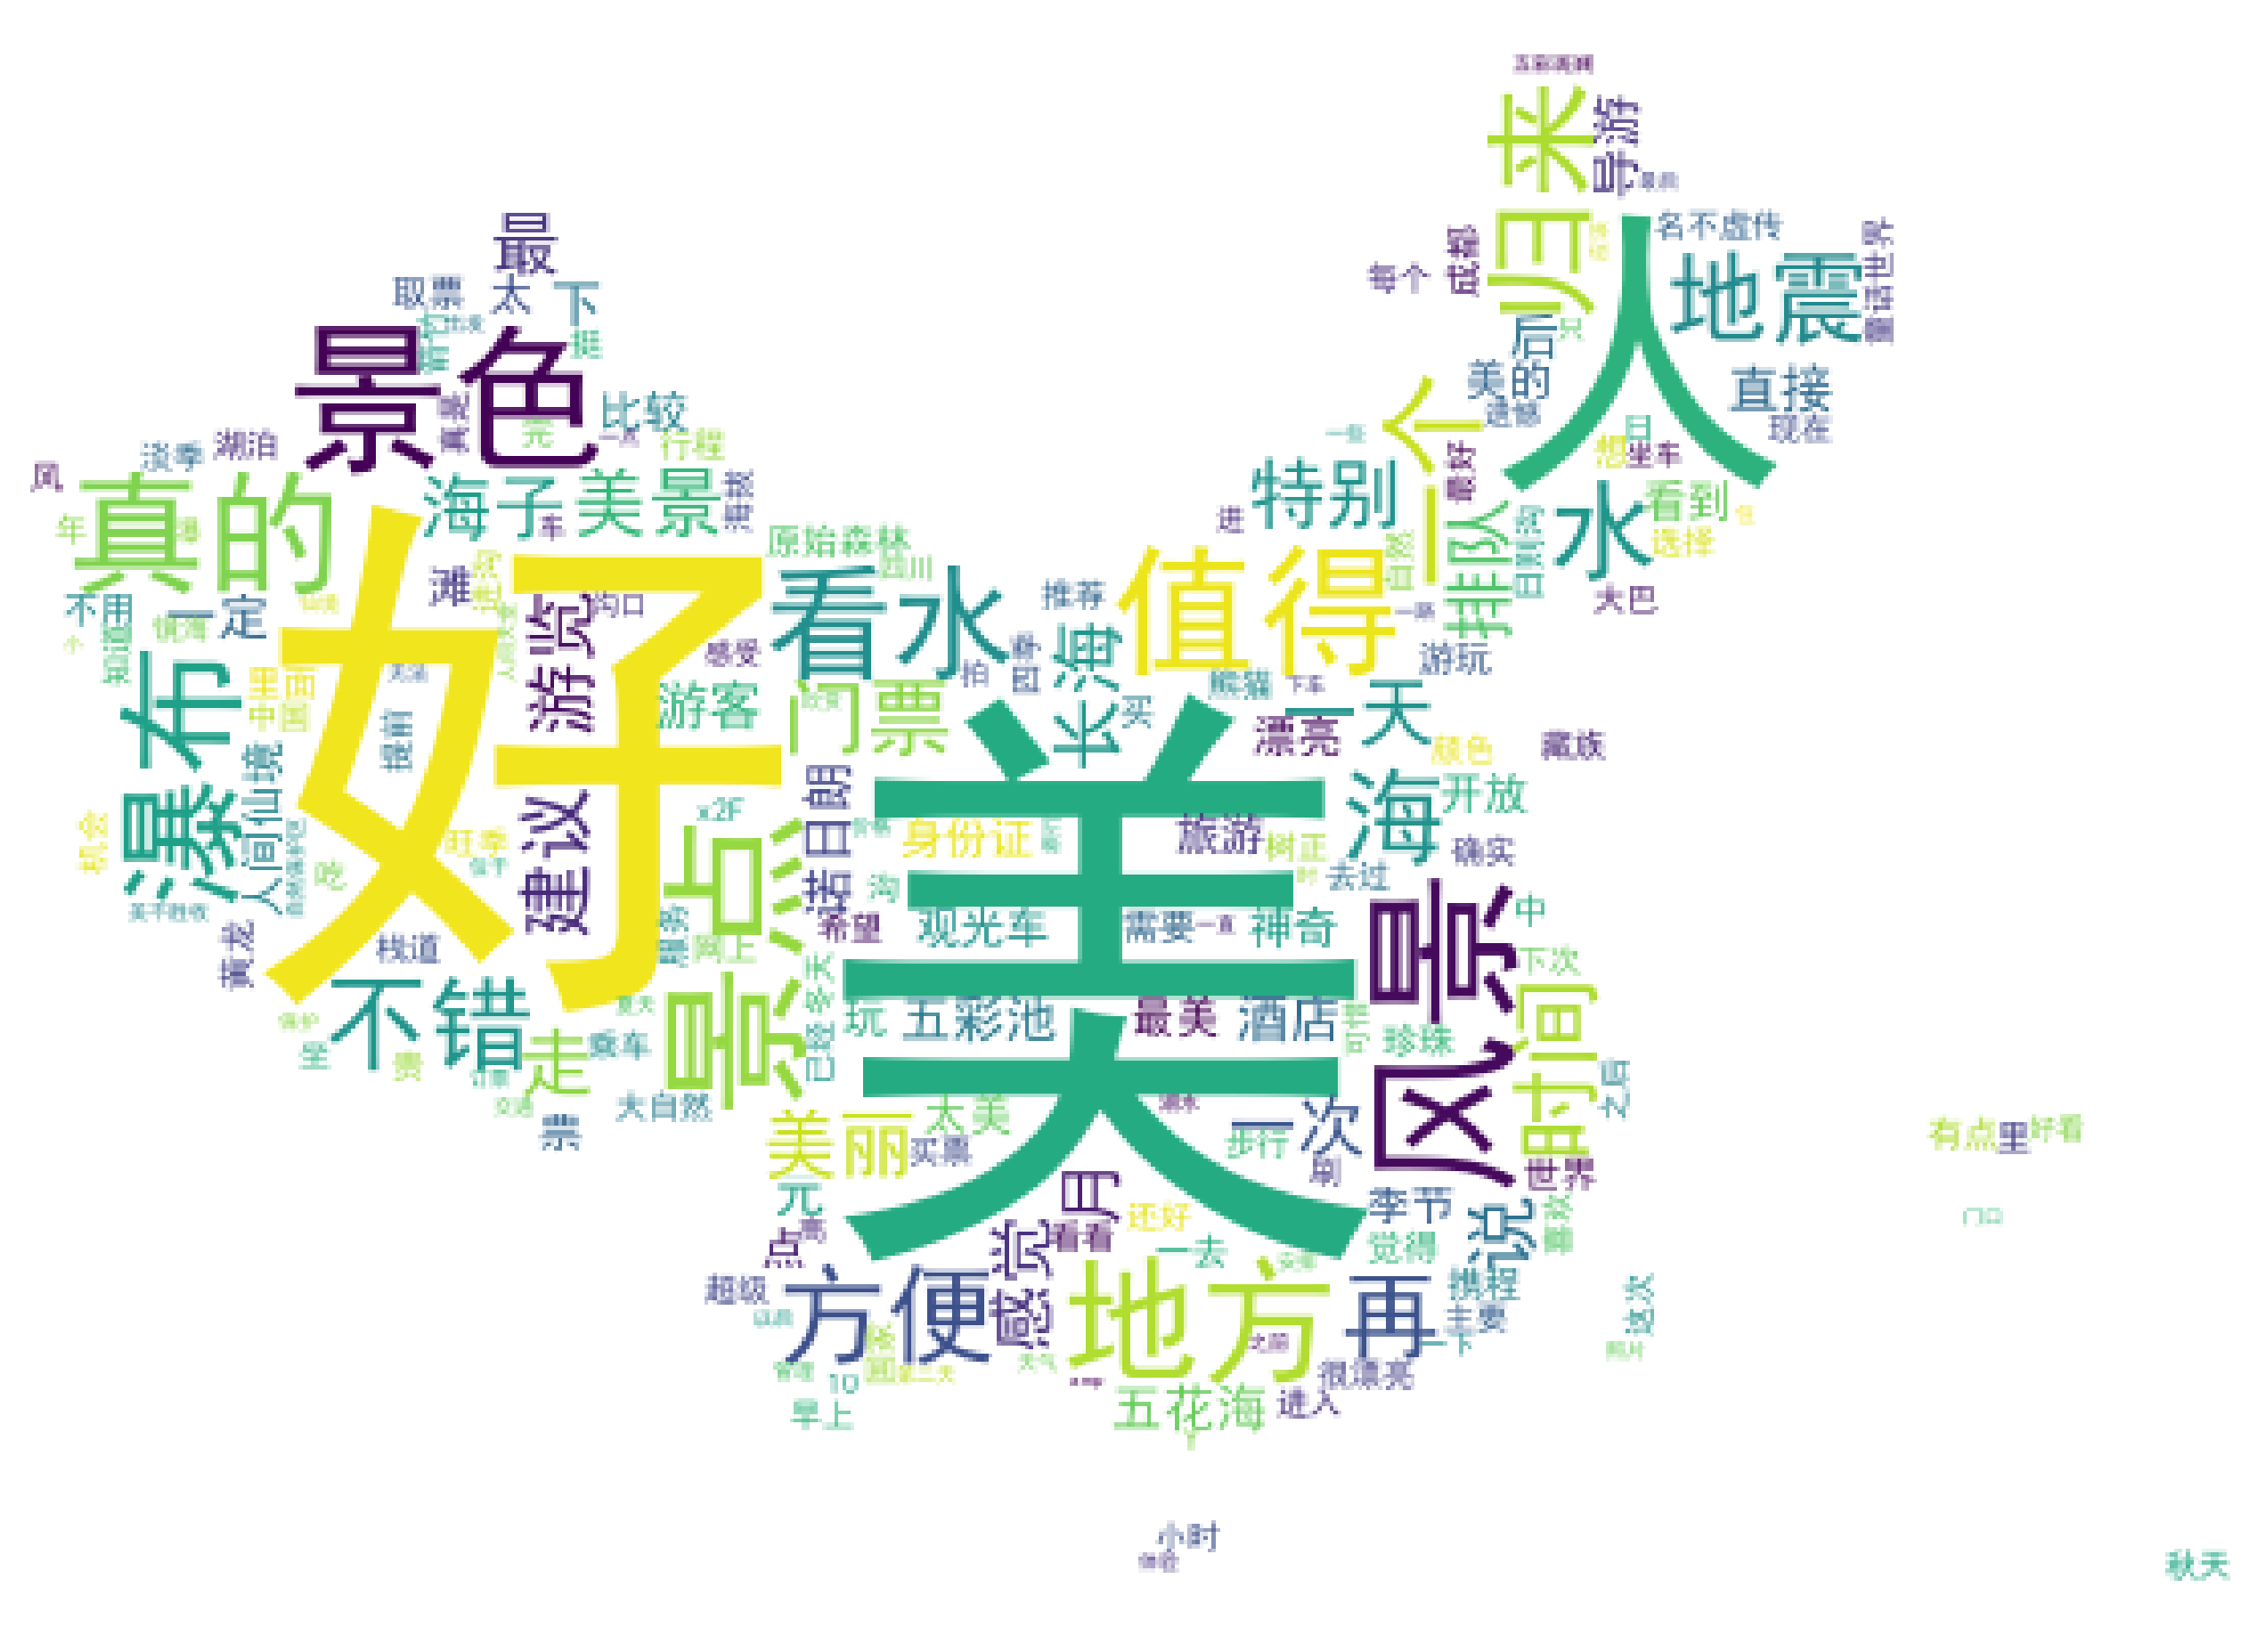

In [149]:
%matplotlib inline
wc_pic = imread('jzg_wordcloud.png')
plt.figure(figsize=(45,45))  #(15,11)) 
plt.imshow(wc_pic) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show()

### 提取关键词

In [92]:
import jieba.analyse

#TF-IDF算法提取关键词
key_words_TFIDF = jieba.analyse.extract_tags(content,topK=2000,withWeight=True)
key_words_TFIDF[:10]

[('景点', 0.06461406285855763),
 ('景色', 0.06181371506599644),
 ('风景', 0.05913370994689393),
 ('看水', 0.058523561429417),
 ('瀑布', 0.04209327063013633),
 ('归来', 0.040609981900663845),
 ('值得', 0.03954606849424136),
 ('非常', 0.037387442000574984),
 ('五彩池', 0.03448339063887257),
 ('真的', 0.03342971253149384)]

In [91]:
key_words_TR = jieba.analyse.textrank(content,topK=2000,withWeight=True)
key_words_TR[:10]

[('景点', 1.0),
 ('景色', 0.9770298787227896),
 ('风景', 0.963108881221932),
 ('瀑布', 0.9275520003733165),
 ('没有', 0.7983751977880217),
 ('值得', 0.7772992957957712),
 ('地方', 0.7549799933624505),
 ('地震', 0.6141370499061521),
 ('时间', 0.5669332571926394),
 ('门票', 0.5491025233574107)]

### LDA主题分析

In [114]:
## 准备预料
corpus=list(jzg_comments['content'])

#加载停用词表
with open('stopwords.txt',encoding='utf-8') as fw:
    stopwords = fw.read() #长字符串
    stopwords = stopwords.split('\n')       #字符串按'\n'分割，构建列表类型

### 可以在stopwords基础上扩展停用词表

In [133]:
# 输出
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))


In [ ]:
## given corpus and stopwords, build LDA model

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

count_vectorizer = CountVectorizer(stop_words=stopwords)
count_data = count_vectorizer.fit_transform(corpus) # 输出即为所有文档中各个词的词频向量。有了这个词频向量，我们就可以来做LDA主题模型了

words = count_vectorizer.get_feature_names()  
total_counts = np.zeros(len(words))
for t in count_data:
    total_counts += t.toarray()[0]
count_dict = (zip(words, total_counts))   # get count for each words!
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:100]
    
# create and fit the LDA model
lda = LDA(n_components=10, n_jobs=-1)
docres=lda.fit(count_data)

print(docres) # 文档--主题矩阵
print(lda.components_) ##主题--主题词矩阵

In [134]:
number_words=20 
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)


Topic #0:
乘车 太美了 人间仙境 美不胜收 很美 最好走栈道 九寨归来不看水 散落在人间的宝镜碎片 可走栈道 旺季走栈道 诺日朗瀑布 值得一看 各种海子 非常漂亮 水清澈见底 很喜欢 风景如画 尤其是水 九寨回来不看水 景色非常漂亮

Topic #1:
九寨归来不看水 方便 很方便 很美 不虚此行 非常方便 不错 人间仙境 五彩池 九寨沟 景色宜人 很好 黄山归来不看山 风景美如画 山清水秀 空气清新 九寨沟很美 值得一看 风景宜人 趣味性强

Topic #2:
九寨归来不看水 名不虚传 太美了 黄山归来不看山 很方便 美不胜收 没有之一 很漂亮 清澈见底 熊猫海 值得一去 非常好 非常棒的五星级 真的很美 让人流连忘返 风景太美了 美极了 九寨沟风景如画 九寨风景真心美无法再用言语形容 珍珠滩瀑布

Topic #3:
九寨归来不看水 九寨沟 风景很好 值得一去 很美 很方便 太美了 非常棒 字形 很不错的地方 风景如画 不虚此行 值得一游 非常好 风景不错 太漂亮了 很棒 人间天堂 风景还是不错的 九寨沟主沟呈

Topic #4:
很好 九寨归来不看水 风景很美 超棒 景色很美 不错 值得推荐 不虚此行 神奇的九寨沟 值得一去 风景优美 风景如画 人间天堂 人间仙境 人间的天堂 还好还好还好还好还好还好还好还好还好还好还好还好还好还好还好还好还好还好还好还好还好还好还好还好还好还好还好 方便 童话世界 很值得一去 九寨沟归来不看水

Topic #5:
x0a x2f 九寨沟 amp 九寨归来不看水 00 五彩池 五花海 160 30 世界自然遗产 是中国第一个以保护自然风景为主要目的的自然保护区 熊猫海 国家级自然保护区 国家地质公园 国家aaaaa级旅游景区 成都 珍珠滩 183 国家重点风景名胜区

Topic #6:
amp quot 太美了 人间仙境 就是人太多了 值得去 很好玩 很不错 祝福九寨沟 感到非常震惊 谢谢九寨沟 回来后就地震 如有机会还会再来 保佑九寨沟人民平安 很漂亮 值得推荐 空气好 风景非常好 童话世界 很方便

Topic #7:
x0a 风景很美 方便快捷 值得一看 值得去 很好 九寨回来不看水 景色很美 很方便 风景很漂亮 各有不同 九寨沟的美景四季不断 遍布原始森林 沟内分布108个湖泊 不错 太美了 童话